# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

ID                             int64
OPEID                          int64
Institution Name              object
City                          object
State                         object
Foreign Gift Received Date     int64
Foreign Gift Amount            int64
Gift Type                     object
Country of Giftor             object
Giftor Name                   object
dtype: object 

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
Max value: 99999999
99th percentile: 7568696.199999988


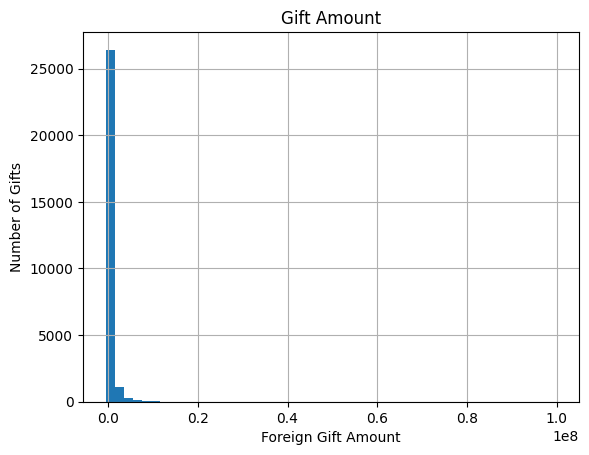

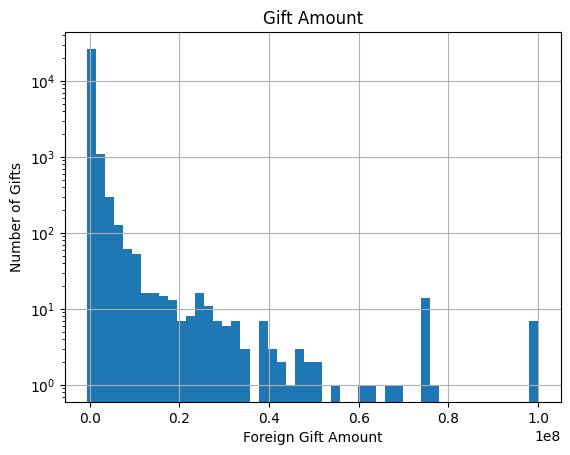

monetary proportion: 0.3875128450444704
contract proportion: 0.6120973742957372
real estate proportion: 0.00038978065979235324


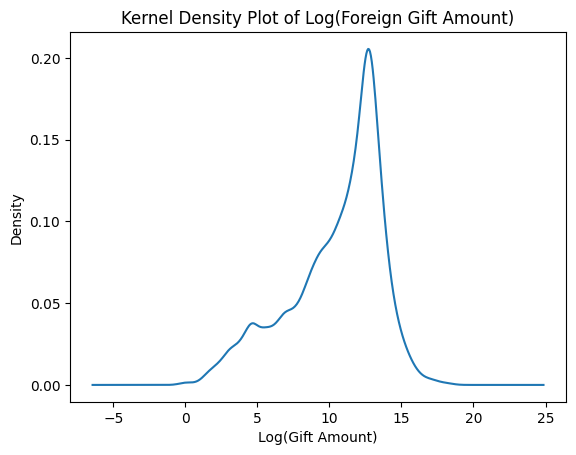

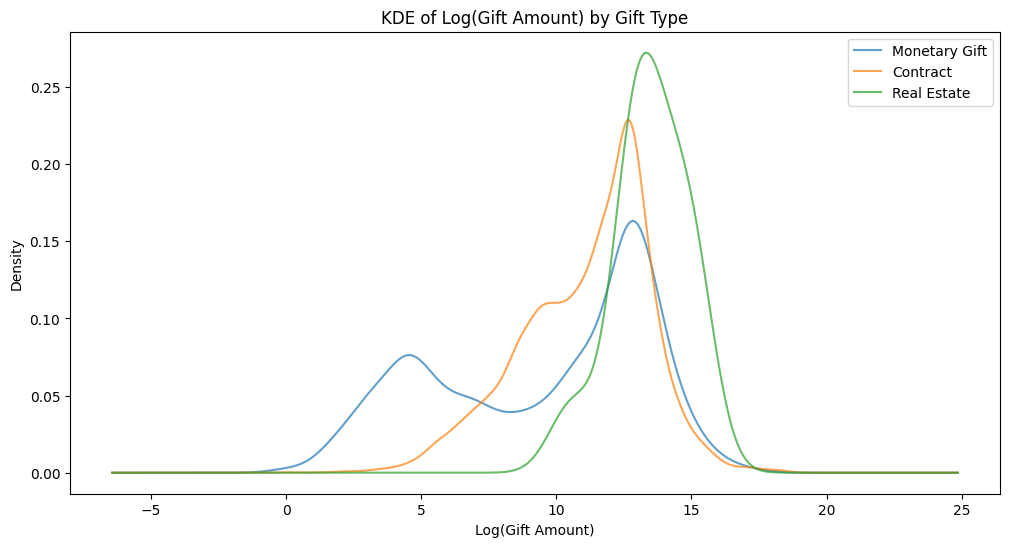

The top 15 countries in terms of number of gifts given: Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                2484092

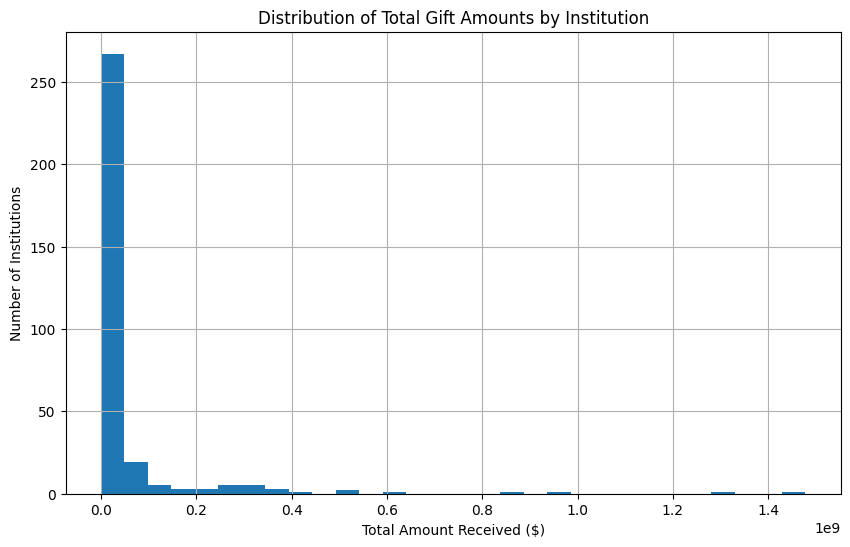

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('/content/ForeignGifts_edu.csv',low_memory=False) #not sure if this is too big to load . . . it worked so i think its fine
print(df.dtypes, '\n')

#create a histogram and describe foreign gift amount
print(df['Foreign Gift Amount'].describe())
print(f"Max value: {df['Foreign Gift Amount'].max()}")
print(f"99th percentile: {df['Foreign Gift Amount'].quantile(0.99)}")

#regular graph
df['Foreign Gift Amount'].dropna().hist(bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Number of Gifts')
plt.title('Gift Amount')
plt.show()


#Create foreign gift amount histogram and describe findings (log)
df['Foreign Gift Amount'].dropna().hist(bins=50)
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Number of Gifts')
plt.title('Gift Amount')
plt.yscale('log')  # or plt.xscale('log') for log x-axis
plt.show()


#creat a histogram or value counts table of gift type, what proportion are contracts, real estate, and monetary gifts

counts = df['Gift Type'].value_counts()
monetary_proportion = counts['Monetary Gift'] / counts.sum()
contract_proportion = counts['Contract'] / counts.sum()
real_estate_proportion = counts['Real Estate'] / counts.sum()
print(f'monetary proportion: {monetary_proportion}')
print(f'contract proportion: {contract_proportion}')
print(f'real estate proportion: {real_estate_proportion}')
#Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?
x = np.log(df[df['Foreign Gift Amount'] > 0]['Foreign Gift Amount'])


# Calculate the necessary statistics
N = len(x)  # Number of observations
sd = np.std(x)  # Standard deviation
min_x = np.min(x)  # Minimum value
max_x = np.max(x)  # Maximum value
# 1. Overall KDE of log(Foreign Gift Amount)
x = np.log(df[df['Foreign Gift Amount'] > 0]['Foreign Gift Amount']).values

def normal_kernel(center, bandwidth):
    """ Normal kernel function. """
    density = np.exp(-(((grid-center)/bandwidth)**2)/2) / (bandwidth * np.sqrt(2*np.pi))
    return density

h = 1.06 * sd * N**(-1/5)  # Silverman's plug-in bandwidth
M = 500
grid = np.linspace(min_x-2*sd, max_x+2*sd, M)

kde = 0*grid
for i in range(len(x)): #compute kernel function for each data point but NOT graph becaues that takes forever to run
    density = normal_kernel(x[i], h)
    kde += density
kde = kde/N




# Just plot the final result
fig = sns.lineplot(x=grid, y=kde)
fig.set(title="Kernel Density Plot of Log(Foreign Gift Amount)",
        xlabel='Log(Gift Amount)', ylabel='Density')
plt.show()
#fig = sns.lineplot(x=grid,y=kde) # Our KDE estimator
#ig.set(title="Our Kernel Density Plot", xlabel='x', ylabel='$\\hat{f}(x)$')

plt.figure(figsize=(12, 6))

#list of the known gift types so can create KDE conditional on this
gift_types = ['Monetary Gift', 'Contract', 'Real Estate']

for gift_type in gift_types:
    # Filter data: only this specific gift type AND positive amounts
    subset = df[(df['Gift Type'] == gift_type) & (df['Foreign Gift Amount'] > 0)]

    if len(subset) > 10:  # Make sure we have enough data points
        # Take log of amounts for THIS gift type only
        x_type = np.log(subset['Foreign Gift Amount']).values

        # Calculate KDE parameters for this subset
        N_type = len(x_type)
        sd_type = np.std(x_type)
        h_type = 1.06 * sd_type * N_type**(-1/5)

        # Compute KDE for this gift type
        kde_type = 0*grid
        for i in range(len(x_type)):
            density = normal_kernel(x_type[i], h_type)
            kde_type += density
        kde_type = kde_type/N_type

        # Plot this gift type's KDE
        plt.plot(grid, kde_type, label=gift_type, alpha=0.7)

plt.title("KDE of Log(Gift Amount) by Gift Type")
plt.xlabel('Log(Gift Amount)')
plt.ylabel('Density')
plt.legend()
plt.show()
#What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
top_15_countries = df['Country of Giftor'].value_counts().head(15)
print(f'The top 15 countries in terms of number of gifts given: {top_15_countries}')

top_15_by_amount = df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_by_amount)
#What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
top_15_by_recieved = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_by_recieved)
# Get total for each institution
institution_totals = df.groupby('Institution Name')['Foreign Gift Amount'].sum()

# Histogram showing distribution of all institutions of amount received
plt.figure(figsize=(10, 6))
institution_totals.hist(bins=30)
plt.xlabel('Total Amount Received ($)')
plt.ylabel('Number of Institutions')
plt.title('Distribution of Total Gift Amounts by Institution')
plt.show()

#Which giftors provide the most money, in total?
#just get the total that is given by any country
top_15_by_amount_total = df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_by_amount_total)


2. When you first graph the histogram all of the values are clustered together at 0 and it appears those are the only monetary values that have gifts. Upon further investigation and finding the min and max of the data this occurs because most gifts are cheaper (under 500k) however there is a gift that is 100 million dollars. This outlier makes it difficult to see all the values. For this reason I graphed the histogram on a log scale that way it was easier to visualize all the values. You can see visually how in graph two you can better see all the values on it vs. graph one where it appears they are all around 0. When describing the data it was seen that while the max value is 1 * 10^8 the acerage is at about 600,000 dollars which further explains why we see this outlier making it hard to visualize the data.

3. monetary proportion: 0.3875128450444704
contract proportion: 0.6120973742957372
real estate proportion: 0.00038978065979235324

4.  All three categories show right-skewed distributions with their primary peak around 13-15. The monetary gift amount category exhibits a clear bimodal distribution, with a dominant peak around 13-15 and a secondary peak around 5. The contract and real estate categories also show minor secondary peaks at lower values, though these are less pronounced than in the monetary category. When combined, the overall distribution shows a strong peak around 13 and a smaller peak around  

5. Top 15 countries in terms of number of gifts given:
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381

Top 15 countries in terms of amount gifted
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202

6. Top 15 insitutions and how much they recieved
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419

The histogram created was originally all concentrated around the 0 for most insitutions with a few larger values. I log transformed the total amount recieved and now you can see that majority of the log( total amount receieved) is concentrated between 6-8.
7. The giftors that give the most are:
Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64
dtype: object 

            Host Id  Review Scores Rating (bin)       Zipcode          Beds  \
count  3.047800e+04                22155.000000  30344.000000  30393.000000   
mean   1.273171e+07                   90.738659  10584.854831      1.530089   
std    1.190270e+07                    9.059519    921.299397      1.015359   
min    5.000000e+02                   20.000000   1003.000000      0.000000   
25%    2.701298e+06                   85.000000  10017.000000      1.000000   
50%    8.551693e

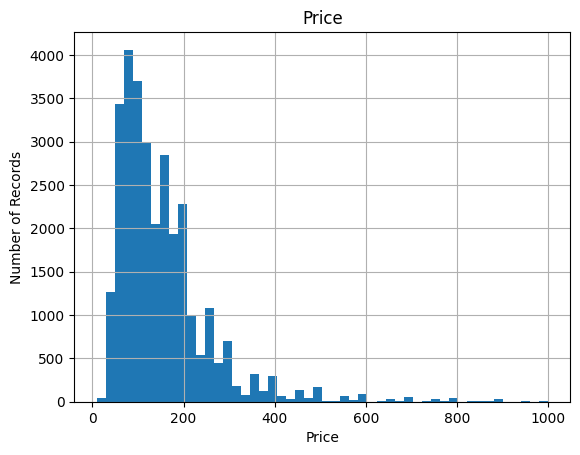

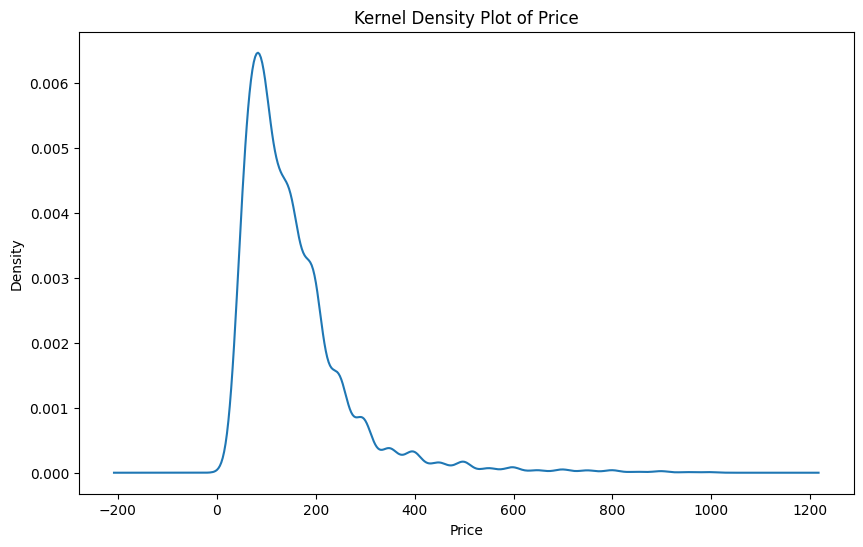

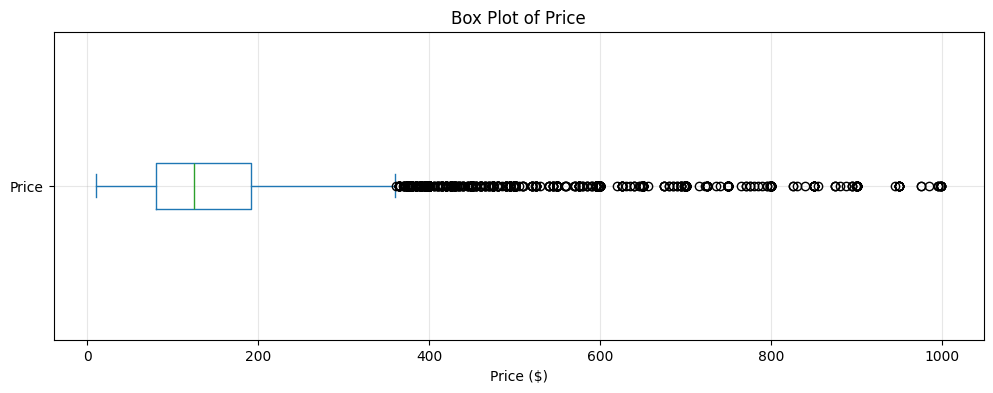

Statistical Summary of Price:
count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64
count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


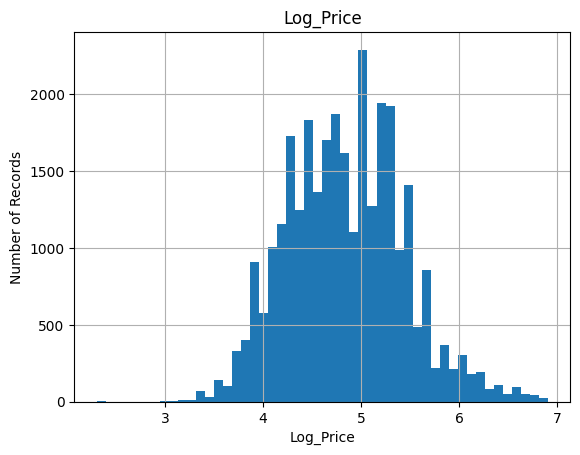

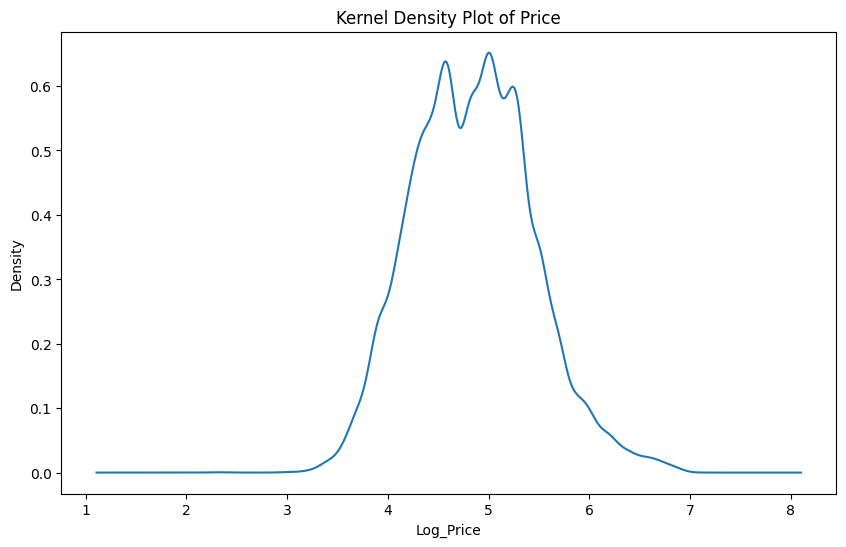

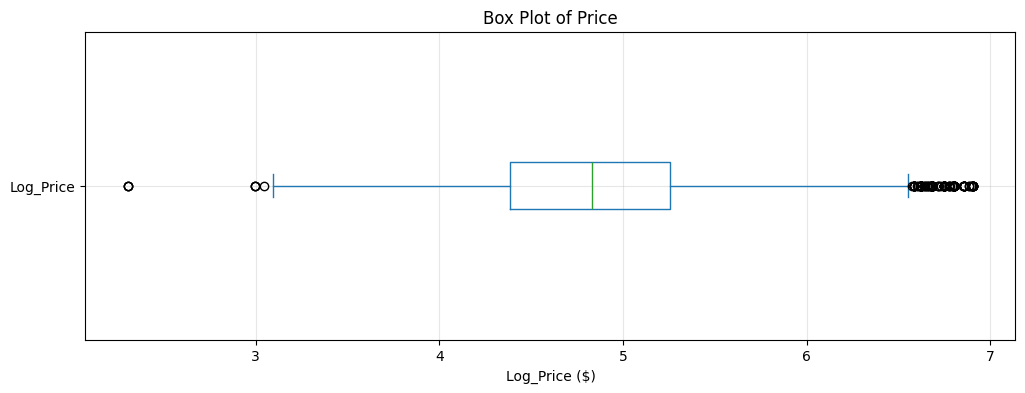

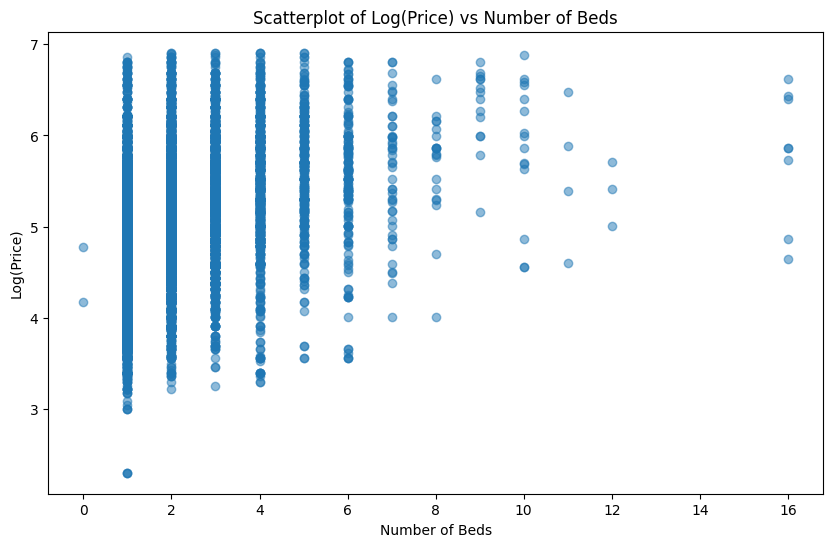

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

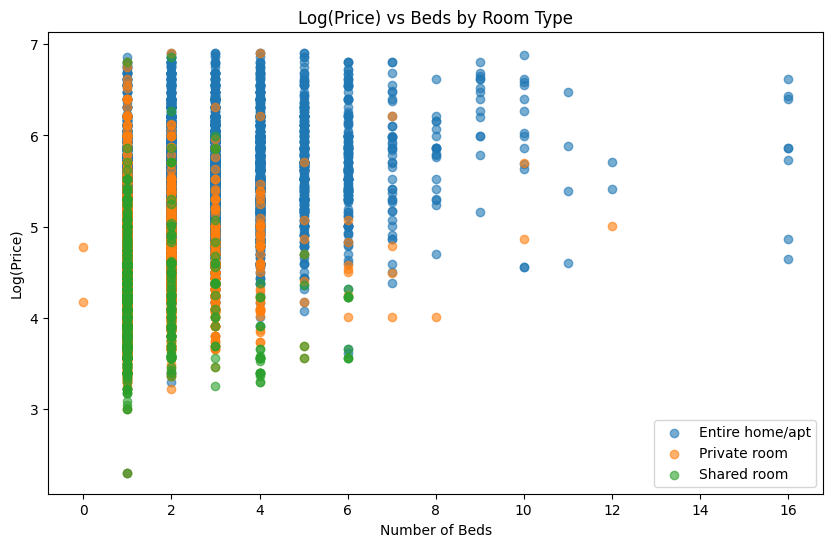

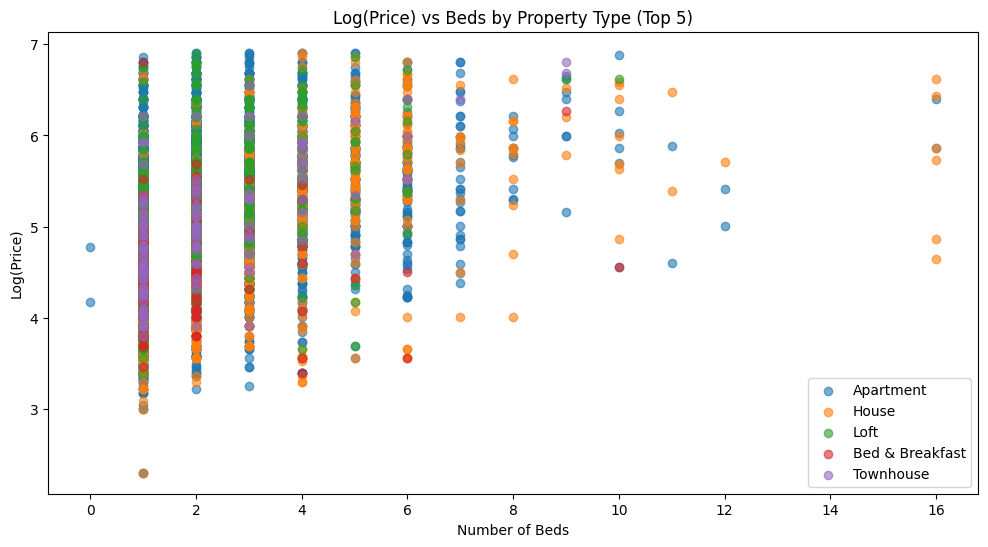

Price by Room Type:
                   count        mean         std   min    25%    50%    75%  \
Room Type                                                                     
Entire home/apt  16855.0  204.061525  116.531136  10.0  135.0  175.0  239.0   
Private room     12599.0   90.663227   47.914195  10.0   65.0   80.0  100.0   
Shared room        843.0   76.553974   65.756210  10.0   45.0   60.0   85.0   

                   max  
Room Type               
Entire home/apt  999.0  
Private room     999.0  
Shared room      950.0  


Price by Property Type:
                   count        mean         std    min     25%    50%  \
Property Type                                                            
Apartment        26975.0  153.863170  104.112805   10.0   85.00  129.0   
Bed & Breakfast    180.0  106.572222   84.701977   30.0   65.00   87.5   
Boat                 8.0  153.625000   49.231051  100.0  120.00  137.5   
Bungalow             4.0  150.750000   46.464144   87.0  133.50

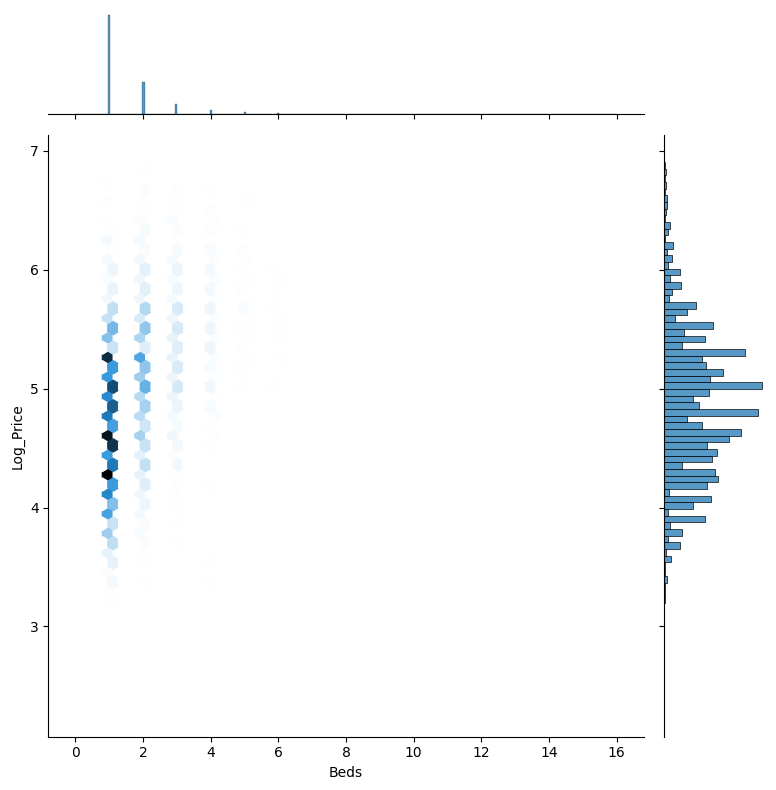

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#(1) What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.
df = pd.read_csv('/content/airbnb_hw.csv')
print(df.dtypes, '\n')
print(df.describe())
df.head(20)
print(len(df))


#(2) Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab)

#
#(3) For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')
print(df['Price'].describe())
df['Price'].dropna().hist(bins=50)
plt.xlabel('Price')
plt.ylabel('Number of Records')
plt.title('Price')
plt.show()



x = df[df['Price'] > 0]['Price'].values  # Keep only this line

N = len(x)
sd = np.std(x)
min_x = np.min(x)
max_x = np.max(x)

def normal_kernel(center, bandwidth):
    """ Normal kernel function. """
    density = np.exp(-(((grid-center)/bandwidth)**2)/2) / (bandwidth * np.sqrt(2*np.pi))
    return density

h = 1.06 * sd * N**(-1/5)
M = 500
grid = np.linspace(min_x-2*sd, max_x+2*sd, M)

kde = 0*grid
for i in range(len(x)):
    density = normal_kernel(x[i], h)
    kde += density
kde = kde/N

plt.figure(figsize=(10, 6))
plt.plot(grid, kde)
plt.title("Kernel Density Plot of Price")
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

# Box plot
plt.figure(figsize=(12, 4))
df['Price'].dropna().plot(kind='box', vert=False)
plt.xlabel('Price ($)')
plt.title('Box Plot of Price')
plt.grid(True, alpha=0.3)
plt.show()

# Statistical description
print("Statistical Summary of Price:")
print(df['Price'].describe())





#(3) with log
df['Price'] = pd.to_numeric(df['Price'], errors = 'coerce')
print(df['Price'].describe())
# Create a new log-transformed price column
df['Log_Price'] = np.log(df['Price'])
df['Log_Price'].dropna().hist(bins=50)
plt.xlabel('Log_Price')
plt.ylabel('Number of Records')
plt.title('Log_Price')
plt.show()



x = df[df['Log_Price'] > 0]['Log_Price'].values  # Keep only this line

N = len(x)
sd = np.std(x)
min_x = np.min(x)
max_x = np.max(x)

def normal_kernel(center, bandwidth):
    """ Normal kernel function. """
    density = np.exp(-(((grid-center)/bandwidth)**2)/2) / (bandwidth * np.sqrt(2*np.pi))
    return density

h = 1.06 * sd * N**(-1/5)
M = 500
grid = np.linspace(min_x-2*sd, max_x+2*sd, M)

kde = 0*grid
for i in range(len(x)):
    density = normal_kernel(x[i], h)
    kde += density
kde = kde/N

plt.figure(figsize=(10, 6))
plt.plot(grid, kde)
plt.title("Kernel Density Plot of Price")
plt.xlabel('Log_Price')
plt.ylabel('Density')
plt.show()

#box plot
plt.figure(figsize=(12, 4))
df['Log_Price'].dropna().plot(kind='box', vert=False)
plt.xlabel('Log_Price ($)')
plt.title('Box Plot of Price')
plt.grid(True, alpha=0.3)
plt.show()

df['Log_Price'].describe()

#(4)Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
# 1. Scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['Beds'], df['Log_Price'], alpha=0.5)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Scatterplot of Log(Price) vs Number of Beds')
plt.show()

# 2. Grouped description
price_by_beds = df.groupby('Beds')['Price'].describe()
print(price_by_beds)

# You might also want to see log price grouped by beds
log_price_by_beds = df.groupby('Beds')['Price'].describe()
#print(log_price_by_beds)



#(5)Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
# 1. Scatterplot colored by Room Type
plt.figure(figsize=(10, 6))
for room_type in df['Room Type'].unique():
    subset = df[df['Room Type'] == room_type]
    plt.scatter(subset['Beds'], subset['Log_Price'], label=room_type, alpha=0.6)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Log(Price) vs Beds by Room Type')
plt.legend()
plt.show()

# 2. Scatterplot colored by Property Type (showing top property types)
plt.figure(figsize=(12, 6))
# Get the most common property types to avoid clutter
top_properties = df['Property Type'].value_counts().head(5).index
for prop_type in top_properties:
    subset = df[df['Property Type'] == prop_type]
    plt.scatter(subset['Beds'], subset['Log_Price'], label=prop_type, alpha=0.6)
plt.xlabel('Number of Beds')
plt.ylabel('Log(Price)')
plt.title('Log(Price) vs Beds by Property Type (Top 5)')
plt.legend()
plt.show()

# 3. Grouped statistics by Room Type
print("Price by Room Type:")
price_by_room = df.groupby('Room Type')['Price'].describe()
print(price_by_room)
print("\n")

# 4. Grouped statistics by Property Type
print("Price by Property Type:")
price_by_property = df.groupby('Property Type')['Price'].describe()
print(price_by_property)


#(6) We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

# Create hexbin jointplot
sns.jointplot(data=df, x='Beds', y='Log_Price', kind='hex', height=8)
plt.show()

1. There are 30478 observations. The data has dimensions of 30478 X 13 columns. The variables that are included and make up the 13 columns are Host Id                             int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                          object
Review Scores Rating          float64

2. Apartments dominate the market with over 27,000 total listings, split fairly evenly between entire homes (15,669) and private rooms (10,748). This suggests apartments are the most common property type for short-term rentals.

Most property types favor entire home rental. For chalets, castles, huts, treehouses, tents it is more likely to get a private room then rent the whole house.

Private rooms outnumber entire home rentals for these property types:

Bed & Breakfasts (155 private vs. 13 entire) - Aligns with the B&B business model
Dorms (16 private vs. 4 entire) - Designed for shared living
Houses (1,258 private vs. 752 entire) - Homeowners renting spare rooms
Castles (1 private vs. 0 entire) - Though this is just one listing
Chalets (1 private vs. 0 entire) - Also just one listing





3. The Price variable exhibits poor scaling characteristics. With a mean of $153.36 and a standard deviation of $108.90, the data shows high variability, as the standard deviation is over 70% of the mean. The distribution is right-skewed, evidenced by the mean ($153.36) being notably higher than the median ($125), indicating that extreme high values are pulling the average upward. The range spans from $10 to $999, representing a very wide spread of $989. This large range combined with the skewness creates visualization challenges, as seen in the histogram where most data points are compressed into a small area on the left side of the plot while a few extreme outliers stretch the scale. There are a large amount of outliers as evidenced by the box plot. You can see there are many outliers (black data points) and that they are such large outliers almost all of them are situated beyone even the whisker of the box plot. While these outliers are at higher monetary values, looking at the KDE it has a left skew and majority of the values are at lower price points but it is clear there are many outliers to this.


After applying a log transformation, the Price variable shows much better scaling properties. The log-transformed prices have a mean of 4.85 and a standard deviation of 0.60, which is much smaller relative to the mean compared to the original scale. The distribution is now approximately symmetric, as evidenced by the mean (4.85) being very close to the median (4.83), with a difference of only 0.02. This near-equality indicates that the log transformation has successfully addressed the right-skewness present in the original data. The range of log prices spans from 2.30 to 6.91, representing a much more manageable spread of 4.61 units. The histogram is now centered around 5, showing a bell-shaped distribution rather than the a skewed distrbution as prior. Further, the left skewed KDE is now centered on the axis further indicating the spreading of values instead of having mainly low values with high value outliers. The box plot is now centered and while the outlies are still outside of the whisker they are much closer to it and less spread out away from it.

4. The scatterplot of Log_price and beds shows discrete liens of data points at each number of beds. This distribution pattern is due to the fact that number of beds is a discrete number and not continuous. However, this scatterplot does show immense variability in prices as between 1-6 bedrooms the price range spanned is essentially the same for all of them. Once increasing to around 8 the prices ten to be only higher but there is not any clear difference between 8-16+ bedrooms in terms of price consistently increasing or having a pattern. When looking at the groupedby data it appeas price increases to its maximum at 9 bedrooms and then begins to decrease again, however this data is not entirely perfect because the higher bedrooms (11,12) only have 3 and 4 listings. However, looking at the standard deviiation it appears that there is extreme variance in this prices. The standard deviation is almost half of the actual price values for some of these. The highest standard deviation is at 10 bedrooms and 11 bedrooms signifying lots of variation in the high bedroom listings.


5. The scatterplot of log_price and beds contigent on room type shows that generally for each number of bedrooms that shared rooms are the cheapest followed by follow rooms being more expensive and entire homes/apartments being the most expensive. It is interesting to see that this is generally true within each number of bedrooms categroy. For the scatterplot on property type it appears that for bedroom numbers typically lofts and apartments are the most expensive for lower bedroom bumbers and for higher bedroom numbers houses are the most expensive.

Entire home/apartments have the highest price on average. Condomiminiums have the highest price on average. The property type with the highest standard deviation is "other" and the room type with the highest standard deviation is entire home/apt. The median is a more reliable estimate of central tendency for this data. Across all room types, the mean is consistently higher than the median, indicating right-skewed distributions with high-priced outliers. For example, for Entire home/apt, the mean ($204) is pulled up by expensive listings, while the median ($175) better represents the typical price. Similarly, for Private rooms, the mean ($91) exceeds the median ($80). Since the median is resistant to outliers while the mean is sensitive to extreme values, the median provides a better representation. This is further evidenced by the extrememly high standard deviations.

6. The data is heavily skewed toward 1-bedroom properties, with the majority of listings concentrated at this level and progressively fewer listings as bedroom count increases. This creates an imbalanced dataset where most information comes from 1-bedroom units while 3+ bedroom properties are relatively rare. This distribution affects the interpretation of previous analyses because the averages and statistics are dominated by 1-bedroom data. Additionally, any trends or patterns we observed, such as price increasing with bedrooms, need to be interpreted cautiously for higher bedroom counts since there is less data supporting those conclusions. The comparisons across bedroom counts are not equally informative, and we have strong evidence about 1-bedroom pricing patterns but much weaker evidence about larger properties. Further, the price data has a much larger spread indicating significant variability in the price listing of the one bedroom places.

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                                    

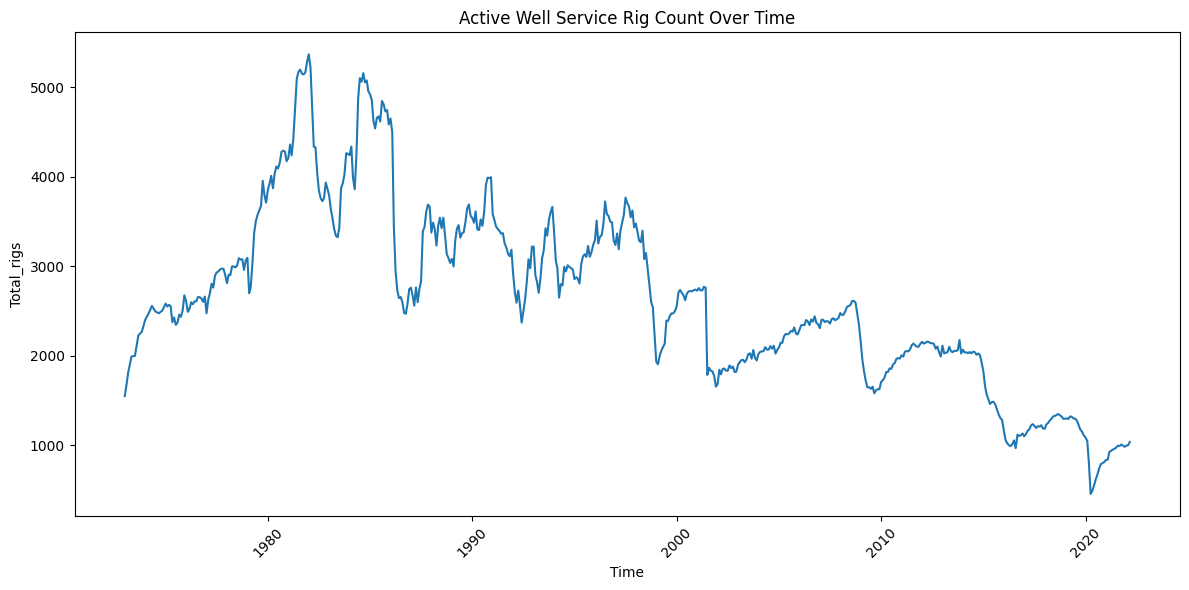

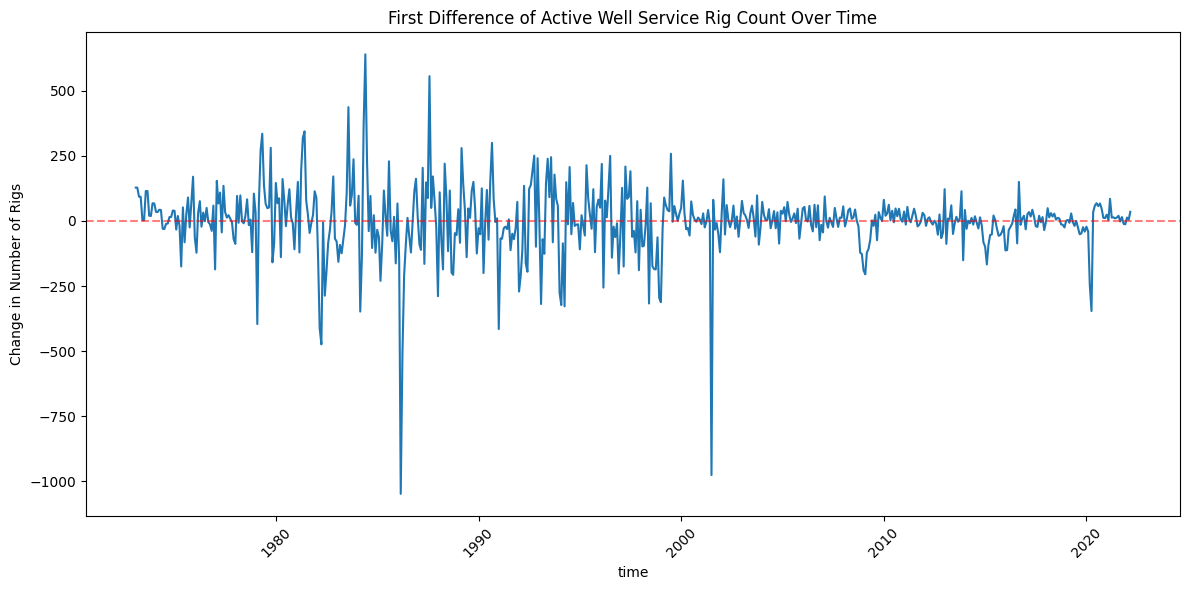

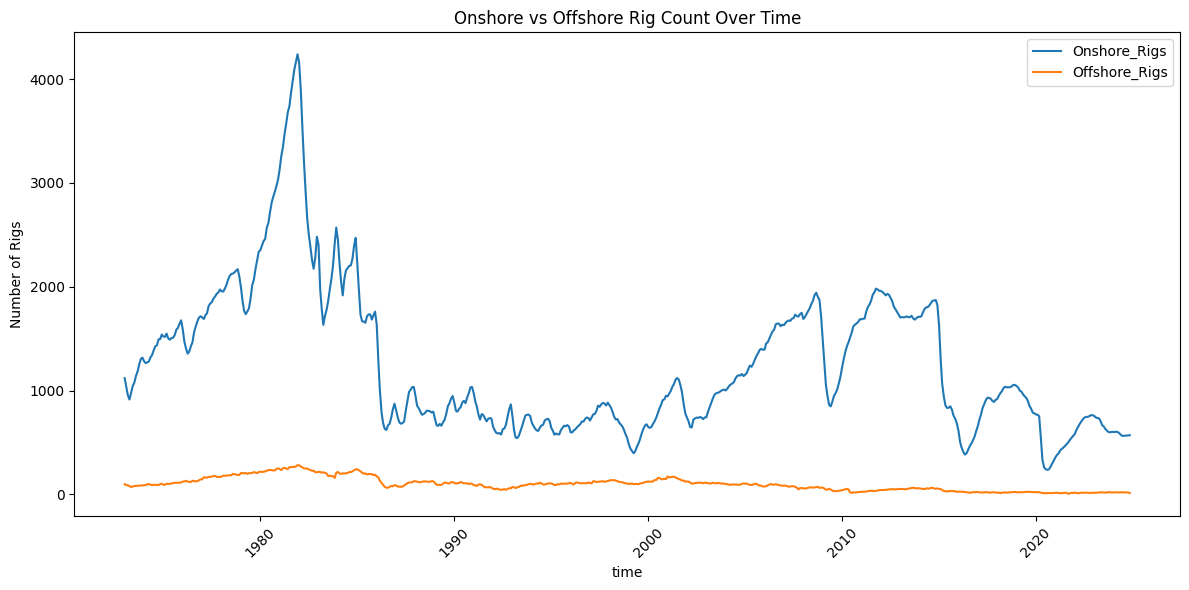

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/drilling_rigs.csv', low_memory = False)
print(df.dtypes, '\n') #also not sure but i think
df.describe()
print(df.head(15))
len(df)

# Replace "Not Available" with NaN
df = df.replace('Not Available', np.nan)
# Convert all rig count columns to numeric
numeric_cols = [
    'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
    'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
    'Active Well Service Rig Count (Number of Rigs)'
]
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df['time'] = pd.to_datetime(df['Month'], format='mixed')
for i, col in enumerate(df.columns):
    print(f"{i}: {col}")

df.columns = ['Month', 'Onshore_Rigs', 'Offshore_Rigs', 'Crude_Oil_Total',
              'Natural_Gas_Total', 'Horizontal', 'Directional', 'Vertical',
              'Total_Rigs', 'Well_Service_Rigs', 'time']
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Well_Service_Rigs'])
plt.xlabel('Time')
plt.ylabel('Total_rigs')
plt.title('Active Well Service Rig Count Over Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Compute first difference
df['Rig_Count_Diff'] = df['Well_Service_Rigs'].diff()

# Plot the first difference
plt.figure(figsize=(12, 6))
plt.plot(df['time'], df['Rig_Count_Diff'])
plt.xlabel('time')
plt.ylabel('Change in Number of Rigs')
plt.title('First Difference of Active Well Service Rig Count Over Time')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)  # Add a reference line at 0
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Melt the onshore and offshore columns
melted_df = df.melt(
    id_vars=['time'],  # Keep Date as identifier
    value_vars=[
        'Onshore_Rigs',
        'Offshore_Rigs'
    ],
    var_name='Location',  # Name for the category column
    value_name='Number of Rigs'  # Name for the values column
)

# Simplify the location names for cleaner legend
melted_df['Location'] = melted_df['Location']
#.str.replace(
 #   'Crude Oil and Natural Gas Rotary Rigs in Operation, ', ''
#).str.replace(' (Number of Rigs)', '')

# Plot the melted data
plt.figure(figsize=(12, 6))
for location in melted_df['Location'].unique():
    subset = melted_df[melted_df['Location'] == location]
    plt.plot(subset['time'], subset['Number of Rigs'], label=location)

plt.xlabel('time')
plt.ylabel('Number of Rigs')
plt.title('Onshore vs Offshore Rig Count Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. The data frame has 623 entries and 10 columns (variables). Some of the data will need to be type casted, for example the "Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)" is an object instead of an int other numeric variables that will need to be typecasted are: month,
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs) Crude Oil and Natural Gas Rotary Rigs in Operation Horizontal Trajectory (Number of Rigs), Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs), Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs), Active Well Service Rig Count (Number of Rigs). To clean this data first we have already disscussed the object variables that need to be coerced. Next to clean this data we must The dataset requires cleaning in several areas: (1) shorten the long column names for usability (2) the Month column needs conversion to datetime format for time series analysis, (3) 'Not Available' values must be converted to NaN. All of this cleaning was performed.

3. Over time this data shows an increase in total rigs to the two tallest peaks early on in the years measured ~1981 and 1986. What is interesting is the low dip between these two tallest peaks and the fact that the two tallest peaks are within 10 years of one another. After the second peak the total number of rigs decreases then we see a kind of decrease and increase over time but no peaks as large as the other two. Once the year hits 2000 while we still see this kind of variation in the data there is an overall steady decrease in total number of rigs.

4. Upon looking at the changes over time the data appears to

5. When graphing the metled data